___________
# Python Code Version 3.0 for
# Climate Mathematics: Theory and Applications - Chapter 6
_____________

<b> Samuel S.P. Shen and Richard C.J. Somerville
____________

This Version 3.0 is authored by Briana Ramirez, edited by Samuel Shen. Liu Yang, Sandra Villamar, and Joaquin Stawsky contributed codes to this version.

Video tutorial for the python code can be found at the following URL:
https://www.youtube.com/channel/UC7D9i0kBMzPTHyEhU0h6W9g

This version is based upon the previous version described in the following box.

In [1]:
######################################################################################################################
#This Python Code for Climate Science is written for the book entitled "Climate Mathematics: Theory and Applications"#
#A Cambridge University Press book authored by SSP Shen and RCJ Somerville in July 2019                              #
#The Python codes were based on the R codes written by Samuel Shen Distinguished Professor,                          #
#San Diego State University, USA and were translated from R by Louis Selstad, Stephen Shen,                          #
#Gregori Clarke, and Dakota Newmann and edited by Samuel Shen.                                                       #
######################################################################################################################

In [2]:
#FIRST TIME Python users*****
#These package need to be installed (on the terminal or anaconda interface) before importing them below. 

#Follow this tutorial for package installation before
# https://towardsdatascience.com/importerror-no-module-named-xyz-45e4a5339e1b

In [3]:
#Change your file path to the folder where your downloaded data is stored
#MAC HELP: https://support.apple.com/guide/mac-help/go-directly-to-a-specific-folder-on-mac-mchlp1236/mac
#PC HELP: https://www.sony.com/electronics/support/articles/00015251
import os
# os.chdir("/Users/sshen/climmath/data")
os.chdir('/Users/HP/Documents/sshen/climmath/data')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
#Style Dictionary to standardize plotting scheme between different python scripts 
import matplotlib.pyplot as plt

styledict = {'xtick.labelsize':20,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':20,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [6]:
#Function that creates personalized discrete Colormap
import numpy as np 
from matplotlib import cm as cm1
from matplotlib.colors import ListedColormap, to_rgba

def newColMap(colors):
    """
    This function creates a new color map from a list of colors given
    as a parameter. Recommended length of list of colors is at least 6.
    """
    first = np.repeat([to_rgba(colors[0])], 2, axis = 0)
    last = np.repeat([to_rgba(colors[-1])], 2, axis = 0)
    v = cm1.get_cmap('viridis', 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0), last, axis=0))



_______
# Chapter 6: Calculus Applications to Climate Science: Derivatives
_______


In [7]:
import numpy as np 
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
warnings.filterwarnings("ignore")
from scipy import optimize as opt
import sympy as sm
from sympy import symbols, diff
import math

_____
# 6.1: Stefan-Boltzmann Law and Budyko's Approximation
_____

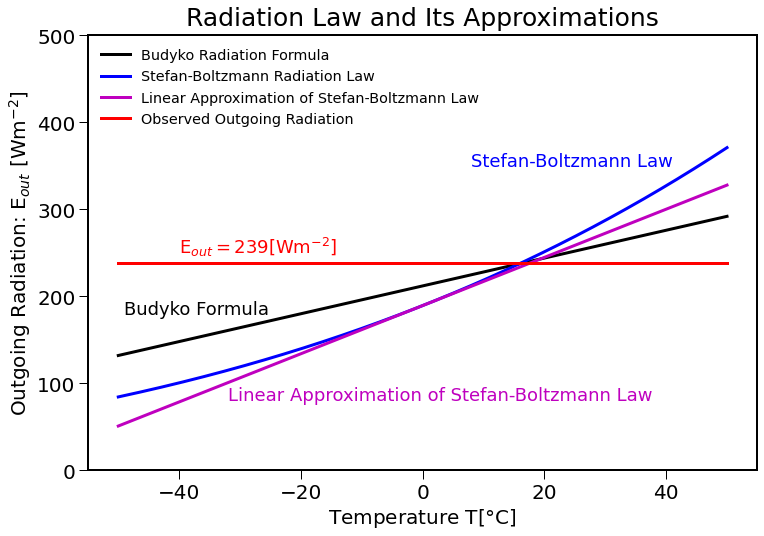

In [8]:
#Fig 6.1
# Cess' Budyko Parameters 
A = 212
B = 1.6 
ep = 0.6 
sg = 5.670367e-8
T = np.linspace(-50,50,10*100)
S = 1365
alf = 0.3

# Plot the Data 
plt.plot(T, A+B*T, "k-", linewidth=3, label="Budyko Radiation Formula")
plt.plot(T, ep*sg*(273.15+T)**4, "b-", linewidth=3, label="Stefan-Boltzmann Radiation Law")
plt.plot(T, 189.4+2.77*T, "m-", linewidth=3, label="Linear Approximation of Stefan-Boltzmann Law")
plt.plot(T, (1-alf)*S/4*np.repeat(1,len(T)), "r-", linewidth=3, label="Observed Outgoing Radiation")

# Add line Labels 
plt.text(-49,180,"Budyko Formula",size=18, color="k")
plt.text(8,350,"Stefan-Boltzmann Law",size=18, color="b")
plt.text(-32,80,"Linear Approximation of Stefan-Boltzmann Law",size=18, color="m")
plt.text(-40,250,"E$_{out}=239$[Wm$^{-2}$]",size=18, color="r")

# Modify Plot parameters
plt.title("Radiation Law and Its Approximations", pad = 10)
plt.xlabel("Temperature T[$\degree$C]")
plt.ylabel("Outgoing Radiation: E$_{out}$ [Wm$^{-2}$]")
plt.ylim(0,500)
plt.legend(loc='upper left', fontsize="x-large")
# plt.grid()
plt.show()

_____
# 6.2: Linear Approximation
_____

Linear approximation of $$f(x)=(1+x)^4$$ by $$L(x)=1+4x$$

In [9]:
# Produce table 6.1 
x = np.linspace(-0.3,0.3,7)
fx = list(range(1,8))
lx = list(range(1,8))
ex = list(range(1,8))
for i in range(7):
    fx[i] = (1+x[i])**4
    lx[i] = 1+4*x[i]
    ex[i] = round(((1+x[i])**4 - (1+4*x[i]))/((1+x[i])**4)*100, 1)

pd.set_option('display.max_columns', None)

my_tbl = pd.DataFrame({"x":x,"f(x)":fx, "L(x)":lx, "Error[%]":ex})

my_tbl

,x,f(x),L(x),Error[%]
0,-0.3,0.2401,-0.2,183.3
1,-0.2,0.4096,0.2,51.2
2,-0.1,0.6561,0.6,8.6
3,0.0,1.0000,1.0,0.0
4,0.1,1.4641,1.4,4.4
5,0.2,2.0736,1.8,13.2
6,0.3,2.8561,2.2,23.0


_____
# 6.3: Bisection Method for Solving Nonlinear Equations 
_____

In [10]:
def func(x):
    return x**3-x-1

opt.bisect(func, 0, 2)

1.324717957244502

In [11]:
# Example 6.2
def func2(x):
    return (1+x)**4 - (2+x)

opt.bisect(func2, 0, 2)

0.22074408460503037

In [12]:
# Example 6.3
S = 1368
ep = 0.6 
sg = 5.670367e-8
def f2(T):
    return ep*sg*T**4 - (1 - (0.5 - 0.2*np.tanh((T-265)/10))) * (S/4)

opt.bisect(f2, 270, 300)

289.30980607804315

_____
# 6.4: Newton's Method
_____

In [13]:
# Create Newton Function
def newton(f, tol=1e-12, x0=1,N=20):
    h = 0.001
    i = 1
    x1 = x0
    p = []
    while i <= N:
        df_dx = (f(x0+h)-f(x0))/h
        x1 = (x0 - (f(x0)/df_dx))
        p.append(x1)
        i = i + 1
        if abs(x1-x0) < tol:
            break
        x0 = x1
    return p[:i-1]

In [14]:
# Create test function for input in Newton Function
def f(x):
    return x**3 + 4*x**2 - 10 

In [15]:
root = newton(f, tol=1e-12, x0=1,N=10)
root

[1.454256341032464,
 1.368917103772529,
 1.3652384598365683,
 1.3652300175883723,
 1.3652300134161426,
 1.3652300134140978,
 1.3652300134140969]

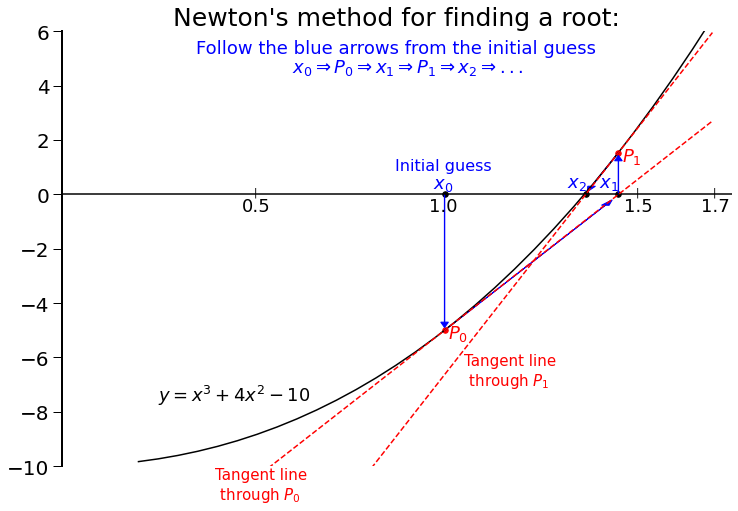

In [16]:
#Fig 6.2
# Illustration of Newton's Method
x = np.linspace(0.2,1.7,30)
def f(x): return x**3 + 4*x**2 - 10 
def g(x): return 3*x**2 + 8*x

x0 = 1
x1 = 1.4543
x2 = 1.3689

fig, ax = plt.subplots(frameon=False)

# Plot the data
plt.plot(x,f(x),"k-")
plt.plot(np.linspace(0,1.75,100),np.zeros(100), "k-")
plt.plot(x, f(x0)+g(x0)*(x-x0),"r--")
plt.plot(x, f(x1)+g(x1)*(x-x1),"r--")

plt.scatter(1,0,s=30,c="k")
plt.scatter(x1,0,s=30,c="k")
plt.scatter(x2,0,s=30,c="k")
plt.scatter(x1,f(x1), s=30, c="r")
plt.scatter(x0,f(x0), s=30, c="r")

# Creating Appropriate tick marks on X-Axis
plt.text(0.5,0,"|")
plt.text(0.47,-0.6,"0.5", fontsize=18)
plt.text(0.96,-0.6,"1.0", fontsize=18)
plt.text(1.5,0,"|")
plt.text(1.47,-0.6,"1.5", fontsize=18)
plt.text(1.7,0,"|")
plt.text(1.67,-0.6,"1.7", fontsize=18)

# Add line Labels and text
plt.text(0.25,-7.6,"$y=x^3+4x^2-10$",size=18, color="k")
plt.text(0.97,0.23,"$x_0$",size=18, color="b")
plt.text(0.87,.9,"Initial guess",size=16, color="b")
plt.text(x1-0.05,0.25,"$x_1$",size=18, color="b")
plt.text(x2-0.05,0.25,"$x_2$",size=18, color="b")
plt.text(0.35,5.2,"Follow the blue arrows from the initial guess",size=18, color="b")
plt.text(0.60,4.5,"$x_0 \Rightarrow P_0 \Rightarrow x_1 \Rightarrow P_1 \Rightarrow x_2 \Rightarrow ...$",
         size=18, color="b")
plt.text(x1+0.01,f(x1)-0.3, "$P_1$", color="r",size=18)
plt.text(0.4, -11.2, "Tangent line \n through $P_0$", color="r",size=15)
plt.text(x0+0.01,f(x0)-0.3, "$P_0$", color="r",size=18)
plt.text(1.05, -7, "Tangent line \n through $P_1$", color="r",size=15)

# Add Descriptive arrows
plt.arrow(1,0,0,f(x0)+0.3,head_width=0.02, head_length=0.2,color="b")
plt.arrow(1,f(x0),0.42,4.6,head_width=0.02, head_length=0.2,color="b")
plt.arrow(x1,0,0,f(x1)-0.3,head_width=0.02, head_length=0.2,color="b")
plt.arrow(x1,f(x1),-0.07,-f(x1)+0.3,head_width=0.02, head_length=0.2,color="b")


# Modify Plot parameters
plt.title("Newton's method for finding a root:")
plt.xlim(0,1.75)
plt.ylim(-10,6)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])

plt.show()

In [17]:
def f(x): return (x+1)**4 - (2+x)
root = newton(f, N=10)
root

[0.5809696800109538,
 0.3335992109385367,
 0.2359959176632994,
 0.22108766698749036,
 0.22074474123732507,
 0.22074408554093847,
 0.22074408460709063,
 0.22074408460576125,
 0.22074408460575942]

In [18]:
# Define Parameters 
S = 1365
ep = 0.6
sg = 5.670367e-8

# Define the function for energy
def f3(T): return ep*sg*T**4 - (1 - (0.5 - 0.2*np.tanh((T-265)/10))) * (S/4)

# Compute Solutions 
root1 = newton(f3, x0=220)
root1

[235.69658970294506,
 234.38606171928143,
 234.3817655891268,
 234.38176551811753,
 234.3817655181173]

In [19]:
# Compute Solutions 
root2 = newton(f3, x0=270)
root2

[262.05664244651985,
 264.50704124959947,
 264.33780214259644,
 264.3376470816254,
 264.3376470803433,
 264.3376470803433]

In [20]:
# Compute Solutions 
root3 = newton(f3, x0=300)
root3

[289.9086198038602,
 289.14701243927755,
 289.1401590537761,
 289.1401583849815,
 289.1401583849732,
 289.1401583849732]

In [21]:
# Compute Solutions 
root5 = newton(f3, x0=100)
root5

[827.2552143021114,
 623.5422659266504,
 474.89725763077905,
 372.56214756821834,
 313.36499589662805,
 292.05532787372726,
 289.2231588691877,
 289.1402443882009,
 289.14015838613426,
 289.1401583849732,
 289.1401583849732]

_____
# 6.5: Examples of Higher-Order Derivatives
_____

In [22]:
x = symbols("x")
diff(x**2)

2*x

In [23]:
x = symbols("x")
def e(i):
    return math.e**i

diff(e(-x**2),x)

-2.0*2.71828182845905**(-x**2)*x

In [24]:
# Higher order derivatives
x = symbols("x")
g = symbols("g")
t = symbols("t")
v0 = symbols("v0")
h0 = symbols("h0")

# First Derivative
fst_dev = diff(-g*t**2/2+v0*t+h0,t)
fst_dev

-g*t + v0

In [25]:
# Second Derivative
sec_dev = diff(fst_dev,t)
sec_dev

-g

In [26]:
# Third Derivative
thr_dev = diff(sec_dev,t)
thr_dev

0